In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import copy
from PIL import Image
import random as rng
import math
from pylab import rcParams
rcParams['figure.figsize'] = 8, 8
%pylab inline --no-import-all



import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

###
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Populating the interactive namespace from numpy and matplotlib


In [ ]:

batch_size = 128
num_classes = 10
epochs = 150
##
img_rows, img_cols = 28, 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Verifying Details
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


(10,)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/40
469/469 [==============================] - 9s 20ms/step - loss: 2.2213 - accuracy: 0.2737 - val_loss: 2.1074 - val_accuracy: 0.6455
Epoch 2/40
469/469 [==============================] - 9s 20ms/step - loss: 1.9766 - accuracy: 0.5360 - val_loss: 1.7538 - val_accuracy: 0.7566
Epoch 3/40
469/469 [==============================] - 9s 20ms/step - loss: 1.5864 - accuracy: 0.6480 - val_loss: 1.2766 - val_accuracy: 0.7953
Epoch 4/40
469/469 [==============================] - 9s 20ms/step - loss: 1.2013 - accuracy: 0.7026 - val_loss: 0.9085 - val_accuracy: 0.8253
Epoch 5/40
469/469 [==============================] - 9s 20ms/step - loss: 0.9581 - accuracy: 0.7394 - val_loss: 0.7089 - val_accuracy: 0.8456
Epoch 6/40
469/469 [==============================] - 9s 20ms/step - loss: 0.8208 - accuracy: 0.7644 - val_loss: 0.5997 - val_accuracy: 0.8593
Epoch 7/40
469/469 [==============================] - 9s 20ms/step - loss: 0.7316 - accuracy: 0.7880 - val_loss: 0.5316 - val_accuracy: 0.8706

In [16]:
#model.save("/content/drive/My Drive/model.h5")
loaded_model=keras.models.load_model("/content/drive/My Drive/model.h5")
model=loaded_model


# Part -2 : Recognisation of suduko Image and its digits

In [8]:
path="/content/drive/My Drive/suduko-3.png"
#path="C:/Users/91938/Desktop/Wallpapers/suduko-3.png"
original=cv2.imread(path)
img=original.copy()
gray_img=cv2.cvtColor(original.copy(),cv2.COLOR_BGR2GRAY )


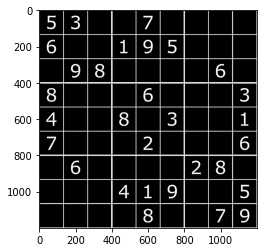

In [9]:
gray_img_gaussian=cv2.GaussianBlur(gray_img,(3,3),cv2.BORDER_CONSTANT)
binary_img= cv2.adaptiveThreshold(gray_img_gaussian,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,11,2)
plt.imshow(binary_img,cmap="gray")

In [10]:
new_img=gray_img.copy()
minLineLength = int((gray_img.shape[0]+gray_img.shape[1])//20)
maxLineGap = int((gray_img.shape[0]+gray_img.shape[1])//200)
lines = cv2.HoughLinesP(binary_img,1,np.pi/180,255,minLineLength,maxLineGap)
for line in lines:
    x1,y1,x2,y2=line[0]
    cv2.line(new_img,(x1,y1),(x2,y2),(255,255,255),2)

In [11]:
# Rotated Rectangle
def rotated_rect(contours):
    rect=cv2.minAreaRect(contours)
    box=cv2.boxPoints(rect)
    box=np.int0(box)
    return box

#Returns left-top,left-bottom,right-top,right-bottom
def sort_rect_arr(arr):
    p1,p2,p3,p4=arr.copy()
    index_0=[p1[0],p2[0],p3[0],p4[0]]
    index_1=[p1[1],p2[1],p3[1],p4[1]]
    #Sorting array based on index_0
    for i in range(4):
        for j in range(i,4):
            if(index_0[i]>index_0[j]):
                temp=index_0[i]
                index_0[i]=index_0[j]
                index_0[j]=temp
                temp_arr=[]

                temp_0,temp_1=arr[i]
                arr[i][0],arr[i][1]=arr[j]
                arr[j]=[temp_0,temp_1]
    #Sorting array for top bottom
    if(arr[0][1]>arr[1][1]):
        temp_0,temp_1=arr[0]
        arr[0][0],arr[0][1]=arr[1]
        arr[1]=[temp_0,temp_1]
    if(arr[2][1]>arr[3][1]):
        temp_0,temp_1=arr[2]
        arr[2][0],arr[2][1]=arr[3]
        arr[3]=[temp_0,temp_1]
    new_arr=[]
    new_arr.append([arr[0],arr[2],arr[3],arr[1]])
    new_arr=np.array(new_arr)
    return new_arr

In [22]:
final_box=original.copy()
img_th = cv2.inRange(new_img ,np.array([255]) ,np.array([255]) )
print(img_th.shape)
contours, hierarchy = cv2.findContours(img_th,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
max_area = 0
for cnt in contours:
    area=cv2.contourArea(cnt)
    if area > max_area:
        brightest_rectangle =cnt
        max_area = area

#The below two is actually not that kinda useful but imporves some accuracy        
epsilon = 0.01*cv2.arcLength(brightest_rectangle,True)
approx = cv2.approxPolyDP(brightest_rectangle,epsilon,True)

# Finding the Suduko Box.The problem is the image of suduko in some cases is not in a perfect rectangle shape . So by bounding it to Rectangle we might include some white space too . But ultimately its inevitable
box=rotated_rect(approx)
box_sorted=tuple(sort_rect_arr(box))
final_box=cv2.drawContours(original.copy(),box_sorted,-1, (0, 255, 0), 3)

(1200, 1200)


In [13]:
# now that we have our rectangle of points, let's compute
# the width of our new image
(tl, tr, br, bl) = box_sorted[0]
widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
# ...and now for the height of our new image
heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
# take the maximum of the width and height values to reach
# our final dimensions
maxWidth = max(int(widthA), int(widthB))
maxHeight = max(int(heightA), int(heightB))
# construct our destination points which will be used to
# map the screen to a top-down, "birds eye" view
dst = np.array([
	[0, 0],
	[maxWidth - 1, 0],
	[maxWidth - 1, maxHeight - 1],
	[0, maxHeight - 1]], dtype = "float32")
# calculate the perspective transform matrix and warp
# the perspective to grab the screen
src=np.asfarray(box_sorted[0],np.float32)
M = cv2.getPerspectiveTransform(src,dst)
warp = cv2.warpPerspective(binary_img.copy(), M, (maxWidth, maxHeight))

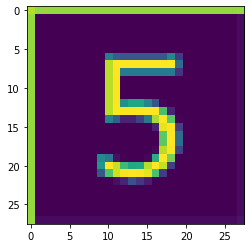

In [17]:
row=[]
grid_arr=[]
b=warp.shape[0]//9
l=warp.shape[1]//9
suduko_digits=[]
for i in range(9):                          #Length
    row=[]                                  
    for j in range(9):                      #breadth
        x=cv2.resize(warp[i*b:(i+1)*b,j*l:(j+1)*l],(28,28),interpolation = cv2.INTER_AREA)                     
        y=x.astype('float32')
        y/=255  
        row.append(x)
        suduko_digits.append(y)
    grid_arr.append(row)
suduko_digits=np.array(suduko_digits)
plt.imshow(suduko_digits[0])

In [18]:
suduko_digits=suduko_digits.reshape(suduko_digits.shape[0],28,28,1)
pred=model.predict(suduko_digits)

In [20]:
suduko_digits[0].shape

(28, 28, 1)

array([[5, 3, 0, 0, 7, 0, 0, 0, 0],
       [6, 0, 0, 1, 9, 5, 0, 0, 0],
       [0, 9, 0, 0, 0, 0, 0, 6, 0],
       [0, 0, 0, 0, 6, 0, 0, 0, 3],
       [4, 0, 0, 0, 0, 3, 0, 0, 1],
       [7, 0, 0, 0, 2, 0, 0, 0, 6],
       [0, 6, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 4, 1, 9, 0, 0, 5],
       [0, 0, 0, 0, 0, 0, 0, 7, 9]])

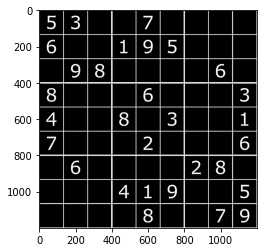

In [ ]:
suduko_arr=np.zeros((9,9))
for i in range(9):
  for j in range(9):
    if(np.max(pred[i*9+j])>0.35):
      suduko_arr[i,j]=int(np.argmax(pred[i*9+j]))
plt.imshow(binary_img,cmap="gray")
suduko_arr=suduko_arr.astype(int)
suduko_arr

# Finally Solving Suduko using Backtracking

In [ ]:
def print_suduko(bo):
  for i in range(9):
    if(i%3==0 and i!=0):
      print("------------------------------")
    for j in range(9):
      if(j%3==0 and j!=0):
        print("|",end=" ")
      if (j==8):
        print(bo[i,j])
      else: 
        print(str(bo[i,j])+ " ",end=" ")

# To find empty and 
def find_empty(bo):
  for i in range(9):
    for j in range(9):
      if(bo[i,j]==0):
        return (i,j)
  return None

5  3  2  | 6  7  8  | 1  9  4
6  4  7  | 1  9  5  | 3  8  2
8  9  1  | 3  4  2  | 5  6  7
------------------------------
1  2  9  | 7  6  4  | 8  5  3
4  8  6  | 9  5  3  | 7  2  1
7  5  3  | 8  2  1  | 9  4  6
------------------------------
9  6  4  | 5  3  7  | 2  1  8
2  7  8  | 4  1  9  | 6  3  5
3  1  5  | 2  8  6  | 4  7  9


In [ ]:
# first check if that num can be inserted or not at that position

def num_validity(bo,num,pos):
  
  # Row check
  # Check if the number under consideration in in any row or not and ingnore the present digit under consideration
  for i in range(9):                # Row
    if(bo[pos[0],i]==num and pos[1]!=i):
      return False
  
  # Col Check

  for i in range(9):                # Col
    if(bo[i,pos[1]]==num and pos[0]!=i):
      return False
  
  # Box check
  
  # This is used to determine the box uder consideration
  box_x=pos[1]//3
  box_y=pos[0]//3
  for i in range(box_y*3, box_y*3 + 3):
        for j in range(box_x * 3, box_x*3 + 3):
            if (bo[i][j] == num and (i,j) != pos):
                return False


In [ ]:
def solve(bo):
  find =find_empty(bo)
  if not find:
    return True
  else :
    row,col=find

  #Sending num from 1-9 and check if it works or not if works insert in and turn the wheel until i find a mistake in code
  for i in range(1,10):
    if(num_validity(bo,i,(row,col))):
      bo[row,col]=i
      if(solve(bo)):
        return True

      bo[row,col]=0
      
    return False

In [ ]:
print_suduko(suduko_arr)
solve(suduko_arr)
print_suduko(suduko_arr)

array([[5, 3, 2, 6, 7, 8, 1, 9, 4],
       [6, 4, 7, 1, 9, 5, 3, 8, 2],
       [8, 9, 1, 3, 4, 2, 5, 6, 7],
       [1, 2, 9, 7, 6, 4, 8, 5, 3],
       [4, 8, 6, 9, 5, 3, 7, 2, 1],
       [7, 5, 3, 8, 2, 1, 9, 4, 6],
       [9, 6, 4, 5, 3, 7, 2, 1, 8],
       [2, 7, 8, 4, 1, 9, 6, 3, 5],
       [3, 1, 5, 2, 8, 6, 4, 7, 9]])

5 3 2  | 6 7 8  | 1 9 4
6 4 7  | 1 9 5  | 3 8 2
8 9 1  | 3 4 2  | 5 6 7
- - - - - - - - - - - - - 
1 2 9  | 7 6 4  | 8 5 3
4 8 6  | 9 5 3  | 7 2 1
7 5 3  | 8 2 1  | 9 4 6
- - - - - - - - - - - - - 
9 6 4  | 5 3 7  | 2 1 8
2 7 8  | 4 1 9  | 6 3 5
3 1 5  | 2 8 6  | 4 7 9
--------------------------------------------------------------------


(None, <matplotlib.image.AxesImage at 0x7f3489793a58>)

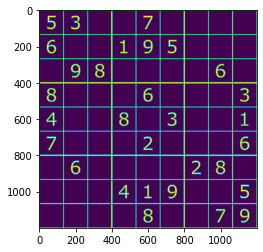